<a href="https://colab.research.google.com/github/rtajeong/Hallym_univ_M34/blob/main/hallym_lab7_dim_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimension Reduction

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [8]:
cancer = load_breast_cancer()
X_all, y = cancer.data, cancer.target

In [9]:
X_all.shape, y.shape

((569, 30), (569,))

In [10]:
X = StandardScaler().fit_transform(X_all)
X.shape

(569, 30)

In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
rfc = RandomForestClassifier()
cross_val_score(rfc, X, y, cv=5).mean()

0.9613569321533924

In [16]:
# let's use just 6 features (20%)

fs = SelectPercentile(chi2, percentile=20)
X_P = fs.fit_transform(X_all, y)
X_P = StandardScaler().fit_transform(X_P)
fs.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False])

In [17]:
fs.scores_, fs.pvalues_

(array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
        1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
        2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
        2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
        1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
        4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
        3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
        1.29886140e+00, 2.31522407e-01]),
 array([8.01397628e-060, 3.32292194e-022, 0.00000000e+000, 0.00000000e+000,
        6.98631644e-001, 2.01012999e-002, 9.00175712e-006, 1.16563638e-003,
        6.11926026e-001, 9.93122221e-001, 3.89553429e-009, 9.21168192e-001,
        1.94877489e-056, 0.00000000e+000, 9.54425121e-001, 4.33366115e-001,
        3.06726812e-001, 5.80621137e-001, 9.92847410e-001, 9.36379753e-001,
        6.11324751e-109, 7.89668299e-040, 0.00000000e+000, 0.00000000e+000

In [18]:
np.array(fs.scores_).argsort()[::-1]

array([23,  3, 13, 22,  2, 20,  0, 12, 21,  1, 26, 10,  6, 25, 27,  7,  5,
       28, 16, 15, 24, 17,  8, 29,  4, 11, 19, 14, 18,  9])

In [19]:
cancer.feature_names[fs.get_support()]

array(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'], dtype='<U23')

In [20]:
cross_val_score(rfc, X_P, y).mean()

0.9262536873156343

In [22]:
# let's take only 2 features
fs = SelectPercentile(chi2, percentile=6)
X_P = fs.fit_transform(X_all, y)
X_P = StandardScaler().fit_transform(X_P)
cancer.feature_names[fs.get_support()]

array(['mean area', 'worst area'], dtype='<U23')

In [24]:
fs.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

In [23]:
cross_val_score(rfc, X_P, y).mean()

0.9103710603943487

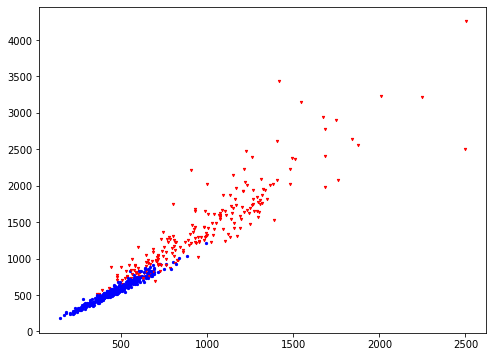

In [27]:
m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(cancer.data[:,3][i], 
              cancer.data[:,23][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

In [31]:
# dimension reduction using PCA

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)  # X: scaled
pca_result

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

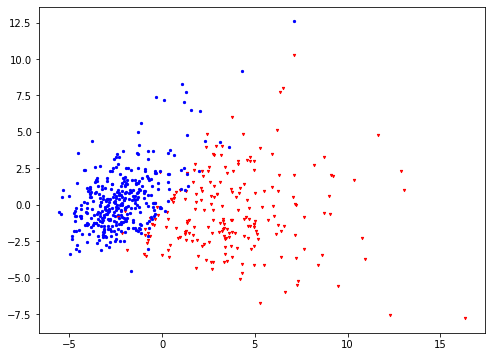

In [32]:
m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(pca_result[:,0][i], 
              pca_result[:,1][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

In [33]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [34]:
cross_val_score(rfc, pca_result, y, cv=5).mean()



0.9315013196708586

In [35]:
pca = PCA(n_components = 6)
pca_result = pca.fit_transform(X)  # X: scaled
cross_val_score(rfc, pca_result, y, cv=5).mean()

0.9489675516224189

In [38]:
# one more function - just for viewing

tsne = TSNE(n_components = 2, verbose=1, perplexity=40, n_iter=1000)
tsne_result = tsne.fit_transform(cancer.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.005s...
[t-SNE] Computed neighbors for 569 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.527470
[t-SNE] KL divergence after 1000 iterations: 0.217801


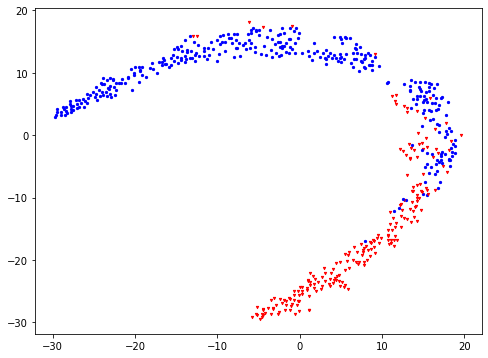

In [39]:
m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(tsne_result[:,0][i], 
              tsne_result[:,1][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.003s...
[t-SNE] Computed neighbors for 569 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.648636
[t-SNE] KL divergence after 1000 iterations: 0.877361


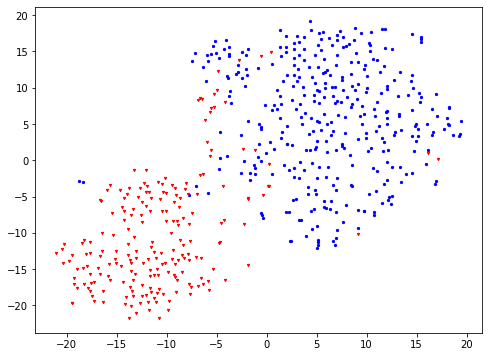

In [40]:
tsne = TSNE(n_components = 2, verbose=1, perplexity=40, n_iter=1000)
tsne_result = tsne.fit_transform(X)

m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
  plt.scatter(tsne_result[:,0][i], 
              tsne_result[:,1][i], 
              marker=m[y[i]],
              color=c[y[i]],
              s=5)
plt.show()

In [41]:
cross_val_score(rfc, tsne_result, y, cv=5).mean()

0.9613103555348548